In [9]:
# 导入库
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. 加载并预处理数据
# 假设数据在 data.csv 中，有多列 'Open'、'High'、'Low'、'Close'、'Volume'

data = pd.read_csv('Reversed_VZ_Data_with_PCA.csv')
#print(data)
features = data[['open', 'high', 'low', 'close', 'volume','Principal Component 1','Principal Component 2']].values

# 标准化数据
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)


# 创建时间序列数据
def create_sequences(data, seq_length, original):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])

        labels.append(features[i+seq_length, 3])  # 使用 'Close' 列（索引 3）作为预测目标

    return np.array(sequences), np.array(labels)

seq_length = 30  # 使用前 30 天的数据预测下一天
X, y = create_sequences(scaled_features, seq_length,features)

print(X.shape)
print(y.shape)

# 转换为 Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 划分训练集和测试集
train_ratio = 0.8
split_idx = int(len(y) * train_ratio)
split_idx = round(split_idx / 32) * 32
start=len(y)%32
X_train = X[start:start+split_idx]  # 前 80% 作为训练集
y_train = y[start:start+split_idx]
X_test = X[start+split_idx:len(y)]
y_test = y[start+split_idx:len(y)]
  # 后 20% 作为测试集
  
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, drop_last=False)

(2519, 30, 7)
(2519,)


ADF Statistic: -1.7261593215428583
p-value: 0.41768729301707797
Critical Values:
   1%: -3.4335785978471383
   5%: -2.86296623151218
   10%: -2.5675292628740047
The time series is non-stationary.
Data is non-stationary. Performing differencing.
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3755.430, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3763.754, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3761.528, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3761.704, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3764.397, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3757.825, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3761.046, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3745.412, Time=0.46 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3756.162, Time=0.31 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=3743.071, Time=0.68 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=3748.055, 

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2039
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1876.382
Date:                Mon, 25 Nov 2024   AIC                           3768.763
Time:                        15:36:27   BIC                           3813.725
Sample:                             0   HQIC                          3785.256
                               - 2039                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.8000      2.775     18.307      0.000      45.361      56.239
ar.L1          1.7216      0.181      9.509      0.000       1.367       2.077
ar.L2         -1.3883      0.280     -4.963      0.0

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


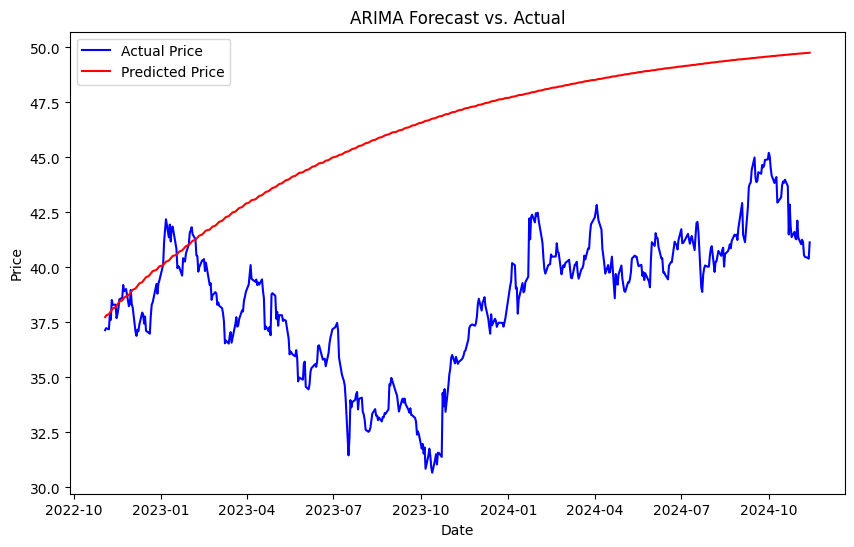

ARIMA predictions saved to 'arima_predictions.csv'


In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Load and preprocess the data
data = pd.read_csv('Reversed_VZ_Data_with_PCA.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Use the 'close' column for ARIMA
close_prices = data['close']

# Train-test split
train_size = int(len(close_prices) * 0.8)
# Train-test split
train, test = close_prices[:train_size], close_prices[train_size:]

# Stationarity check using ADF test 平稳性检验
adf_result = adfuller(train)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Critical values for 1%, 5%, and 10%
critical_values = adf_result[4]
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Check stationarity
if adf_result[0] < critical_values["1%"]:
    print("The time series is stationary at the 1% significance level.")
elif adf_result[0] < critical_values["5%"]:
    print("The time series is stationary at the 5% significance level.")
elif adf_result[0] < critical_values["10%"]:
    print("The time series is stationary at the 10% significance level.")
else:
    print("The time series is non-stationary.")

# Differencing if non-stationary 差分
if adf_result[1] > 0.05:
    print("Data is non-stationary. Performing differencing.")
    train_diff = train.diff().dropna()
else:
    print("Data is already stationary.")
    train_diff = train

# Auto ARIMA for parameter selection
auto_model = auto_arima(train_diff, seasonal=False, trace=True)
p, d, q = auto_model.order
print(f"Optimal ARIMA Order: {p, d, q}")
# p, d, q = 1, 1, 0  # Manually override if needed

# Train ARIMA Model
arima_model = ARIMA(train, order=(p, d, q))
arima_result = arima_model.fit()
print(arima_result.summary())

# Forecast on the test set
forecast = arima_result.forecast(steps=len(test))
test_rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Test RMSE: {test_rmse}")

# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Price', color='blue')
plt.plot(test.index, forecast, label='Predicted Price', color='red')
plt.title("ARIMA Forecast vs. Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Save results
results_df = pd.DataFrame({
    'timestamp': test.index,
    'Actual Price': test.values,
    'Predicted Price': forecast
})
results_df.to_csv('arima_predictions.csv', index=False)
print("ARIMA predictions saved to 'arima_predictions.csv'")
